<a href="https://colab.research.google.com/github/keripikkaneboo/Machine-Learning/blob/main/05.%20Week%205/TugasWeek5_netflix_titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/keripikkaneboo/Machine-Learning/refs/heads/main/05.%20Week%205/Datasets/netflix_titles.csv"
df = pd.read_csv(url)

# Tampilkan info awal
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# =============================================
# FEATURE ENGINEERING
# =============================================

# 1. Pisahkan 'duration' menjadi angka dan satuan
df[['duration_num', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_num'] = pd.to_numeric(df['duration_num'])

# 2. Ubah 'date_added' ke format datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')


# 3. Tambahkan kolom 'year_added' dan 'month_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# 4. Tambahkan flag jika ada direktur atau tidak
df['has_director'] = df['director'].notnull().astype(int)

<ipython-input-5-e6c871c4ea1f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


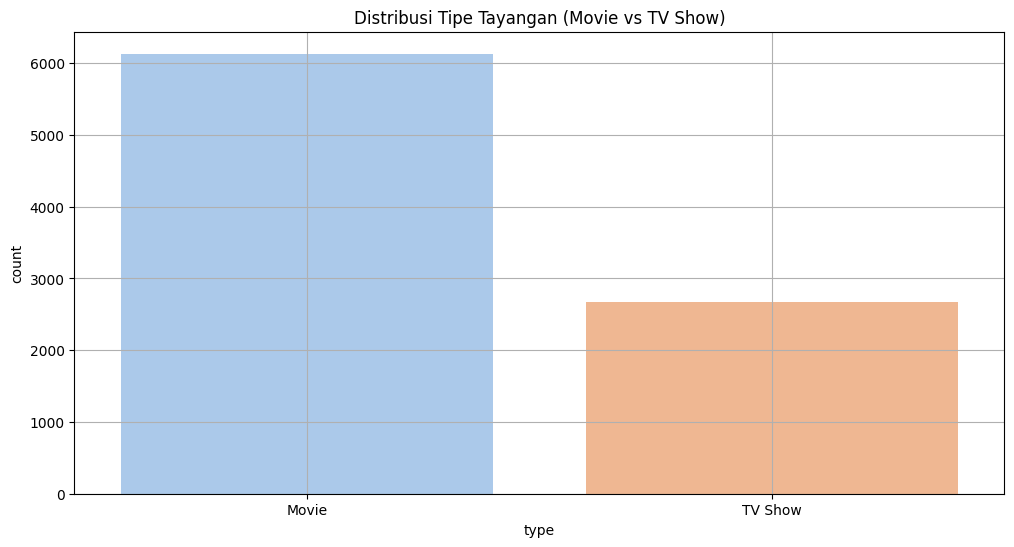

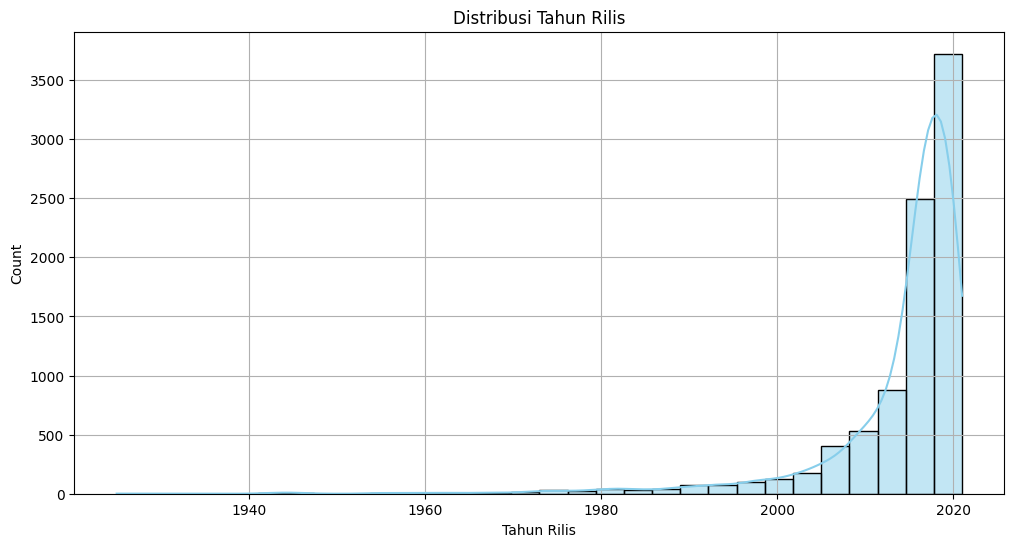

<ipython-input-5-e6c871c4ea1f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='Set2')


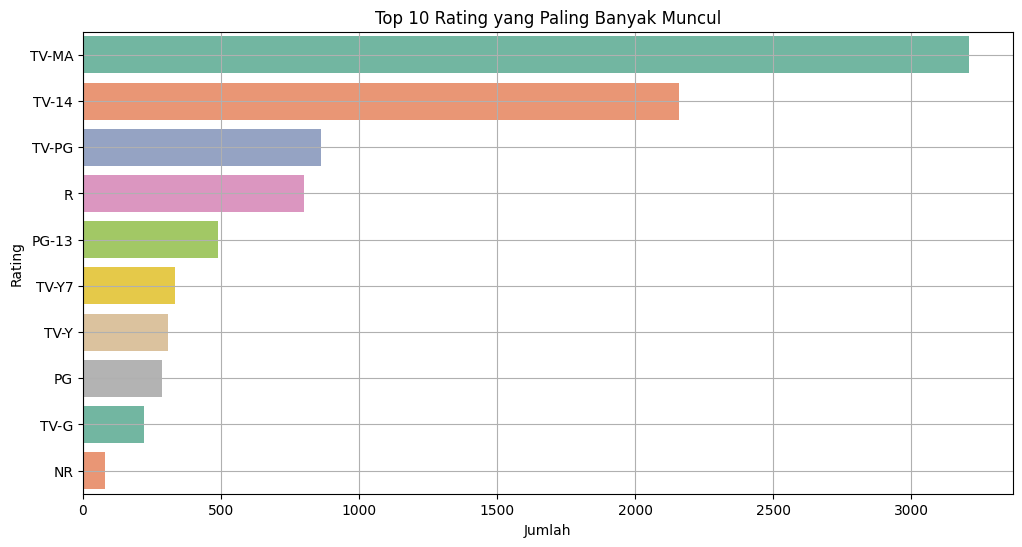

<ipython-input-5-e6c871c4ea1f>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


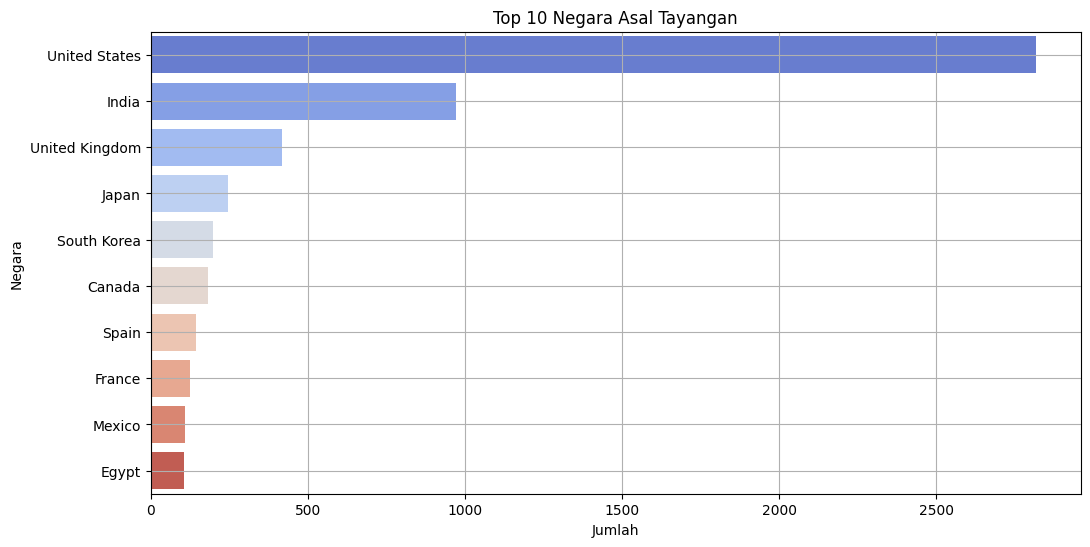

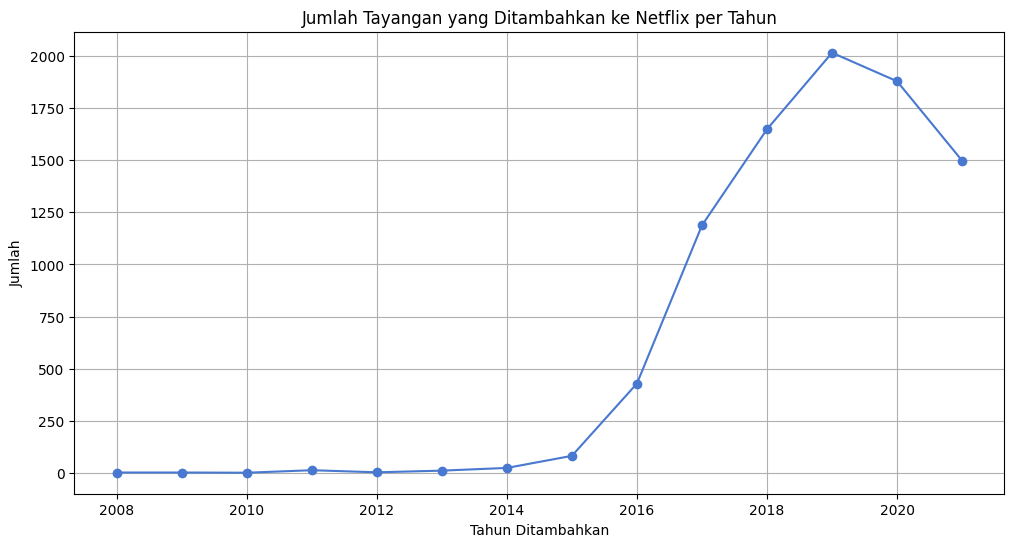

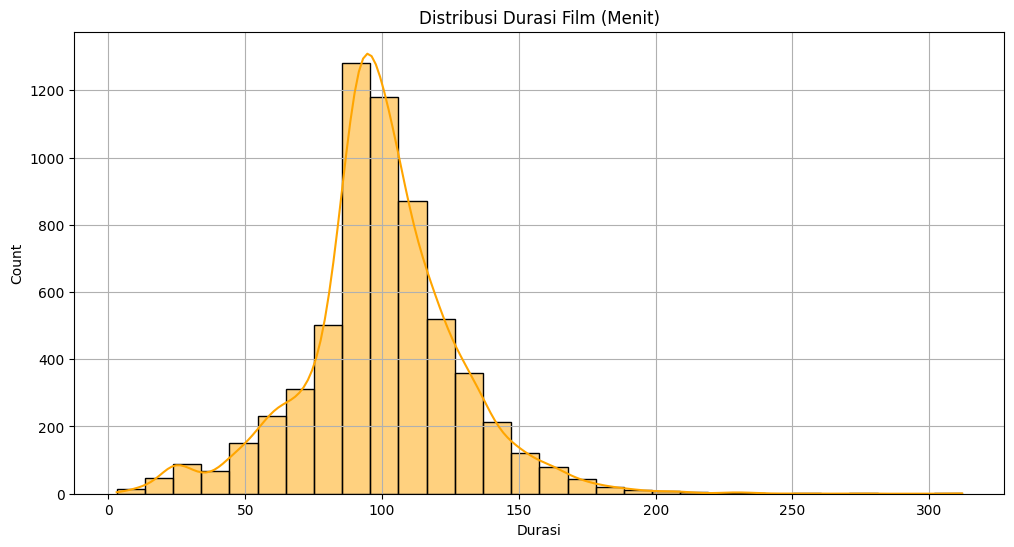

<ipython-input-5-e6c871c4ea1f>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=tv_df['duration_num'], palette='Purples')


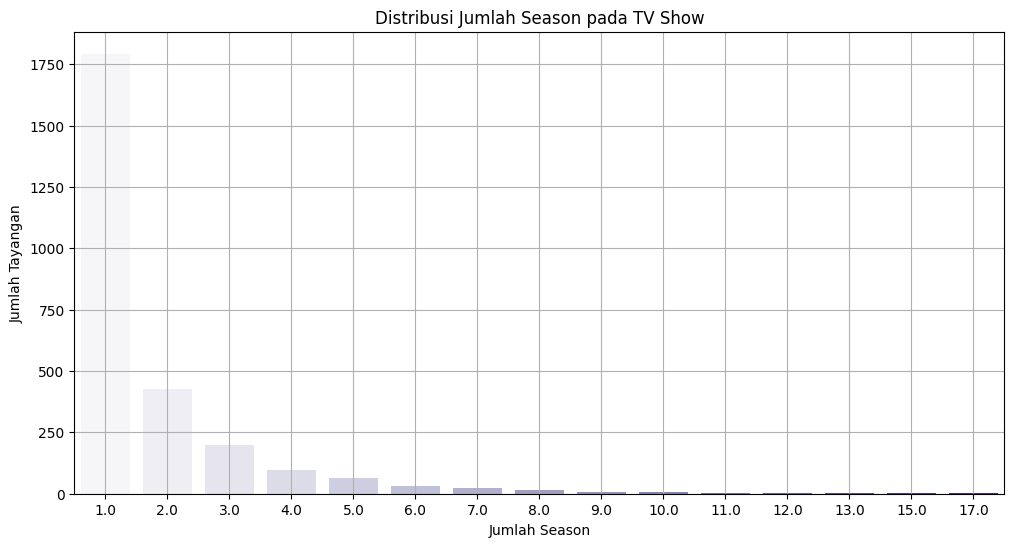

In [5]:
# =============================================
# EDA & DATA VISUALIZATION
# =============================================

plt.style.use('seaborn-v0_8-muted')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Jumlah Movie vs TV Show
plt.figure()
sns.countplot(x='type', data=df, palette='pastel')
plt.title("Distribusi Tipe Tayangan (Movie vs TV Show)")
plt.grid(True)
plt.show()

# 2. Distribusi tahun rilis
plt.figure()
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Tahun Rilis")
plt.xlabel("Tahun Rilis")
plt.grid(True)
plt.show()

# 3. Rating terbanyak
plt.figure()
top_ratings = df['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.values, y=top_ratings.index, palette='Set2')
plt.title("Top 10 Rating yang Paling Banyak Muncul")
plt.xlabel("Jumlah")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

# 4. Negara dengan tayangan terbanyak (top 10)
plt.figure()
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Negara Asal Tayangan")
plt.xlabel("Jumlah")
plt.ylabel("Negara")
plt.grid(True)
plt.show()

# 5. Tren penambahan tayangan ke Netflix per tahun
plt.figure()
df['year_added'].value_counts().sort_index().plot(marker='o')
plt.title("Jumlah Tayangan yang Ditambahkan ke Netflix per Tahun")
plt.xlabel("Tahun Ditambahkan")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

# 6. Distribusi durasi film (dalam menit)
plt.figure()
movie_df = df[df['type'] == 'Movie']
sns.histplot(movie_df['duration_num'].dropna(), bins=30, kde=True, color='orange')
plt.title("Distribusi Durasi Film (Menit)")
plt.xlabel("Durasi")
plt.grid(True)
plt.show()

# 7. Jumlah TV Show berdasarkan jumlah season
plt.figure()
tv_df = df[df['type'] == 'TV Show']
sns.countplot(x=tv_df['duration_num'], palette='Purples')
plt.title("Distribusi Jumlah Season pada TV Show")
plt.xlabel("Jumlah Season")
plt.ylabel("Jumlah Tayangan")
plt.grid(True)
plt.show()

- **Rata-rata (Mean)**:  
$$
  \mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$  
  Di mana $x_i$ adalah tahun rilis ke-i, dan $ n $ adalah jumlah total tayangan.

- **Standar deviasi (Standard Deviation)**:  
  $$
  \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2}
  $$

- **Kuartil** didapat dengan mengurutkan data dan mencari nilai di posisi 25%, 50%, dan 75% dari jumlah data.

